# imports

In [1]:
# export
import numpy as np

In [2]:
# export
import tifffile as tiff

In [3]:
# export
import cv2

In [4]:
from matplotlib import pyplot as plt

# functions

In [5]:
# export
def to_8bit(x):
    '''
    把x内的像素值转换到[0,255]范围。
    --------------------
    input:
    x: 一个array，维度为[h,w,3]，其中最后一个维度的三个通道为 R,G,B
    --------------------
    return: 一个array，维度与x一致，但是像素值被转换到了[0,255]范围
    --------------------
    '''
    chmax = x.max(axis=(0,1))
    chmin = x.min(axis=(0,1))
    x = (x-chmin)/(chmax-chmin)*255
    x = x.astype(np.uint)
    return x

In [6]:
# export
def tif2rgb(x):
    '''
    把x转换为rgb图像。
    -----------------------
    input:
    x: 一个array，维度为[c,h,w]，其中第一个维度的通道数c>3，且其前3个通道为 B,G,R
    -----------------------
    return: 一个array，维度为[h,w,3]，通道为R,G,B，且像素值在[0,255]范围
    '''
    x = x.transpose((1,2,0))
    x = x[...,[2,1,0]]
    x = to_8bit(x)
    x = x.astype(np.uint)
    return x

In [7]:
# export
def tif2mask(x,mask_value=255):
    '''
    把x转换为单通道mask.
    --------------------------
    input:
    x: 一个array，维度为[c,h,w]，其中第一个维度的通道数c>=1，其中值>0的像素为mask
    mask_value：在输出中，mask像素的值设置为mask_value
    --------------------------
    return: 一个array，维度为[h,w]，mask像素值为mask_value，其它像素值为0
    '''
    x = x.transpose((1,2,0))
    x = x[...,0]
    x[x>0] = mask_value
    x = x.astype(np.uint)
    return x

In [8]:
# export
def save_tif_as_fig(tif_fn, fig_fn, is_mask=False, mask_value=255):
    '''
    把tif文件转换并保存为图像文件。
    ------------------------------------
    input:
    tif_fn: tif文件的路径
    fig_fn：要保存的图像文件的路径
    is_mask：是否mask
    mask_value：若is_mask=True，则mask像素值设置为mask_value
    '''
    tif = tiff.imread(tif_fn)
    if is_mask:
        fig = tif2mask(tif, mask_value)
    else:
        fig = tif2rgb(tif)
    cv2.imwrite(fig_fn, fig)

# test

## tif 转 rgb

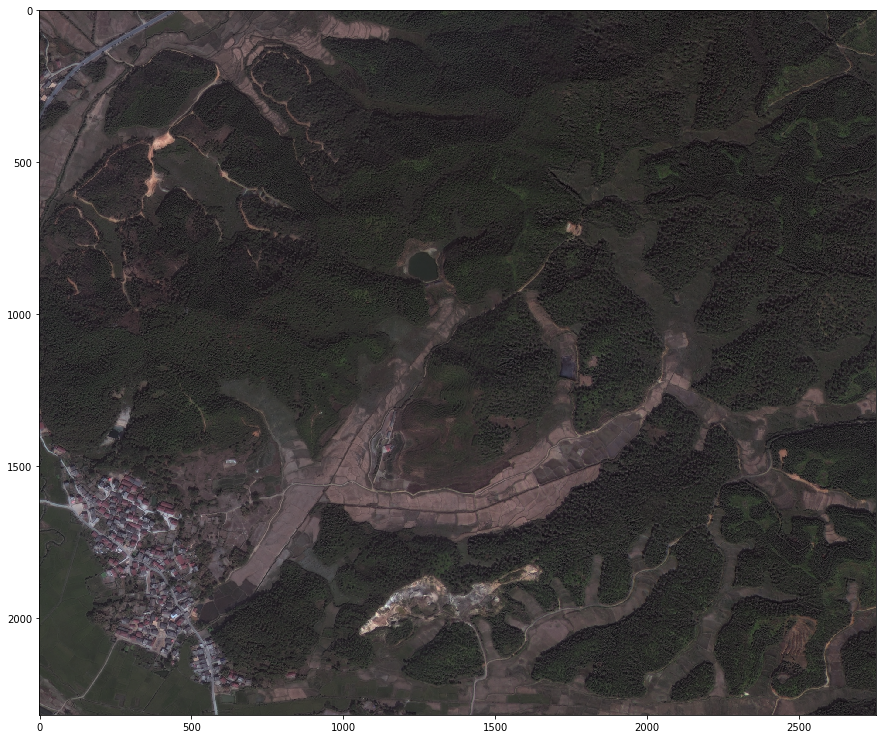

In [9]:
tif = tiff.imread('./data/src/2.tif')
rgb = tif2rgb(tif)

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(rgb);

## tif 转 mask

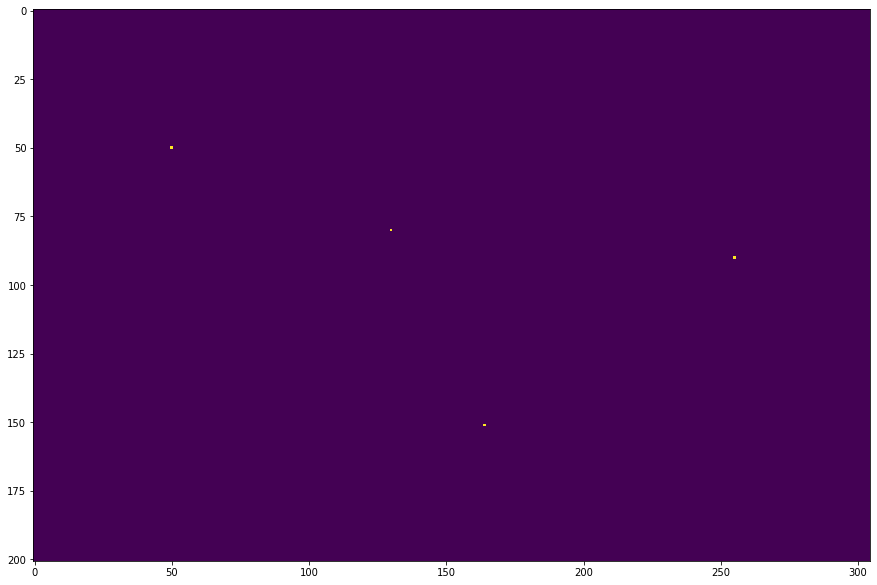

In [10]:
tif = tiff.imread('./data/src/2p.tif')
mask = tif2mask(tif)

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(mask[960:1161, 527:832]);

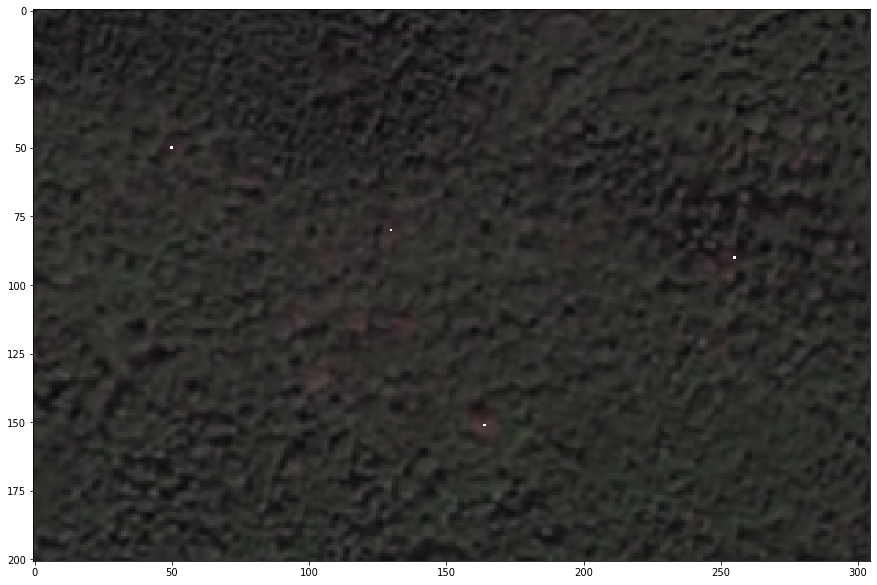

In [11]:
mask = mask[960:1161, 527:832, None]
rgb = rgb[960:1161, 527:832]
fig_mask = rgb + mask
fig_mask = fig_mask.clip(max=255)

_,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(fig_mask);

## tif 存为图片

In [12]:
# tif_fn = './data/src/2.tif'
# fig_fn = './data/src/2.jpg'
# save_tif_as_fig(tif_fn, fig_fn)

In [13]:
# tif_fn = './data/src/2p.tif'
# fig_fn = './data/src/2p.png'
# save_tif_as_fig(tif_fn, fig_fn, is_mask=True)

# export

In [14]:
!python notebook2script.py --fname 'tif2fig.ipynb' --outputDir './exp/'

Converted tif2fig.ipynb to exp/nb_tif2fig.py
